## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/CSE519

/content/drive/MyDrive/CSE519


# Download data from Kaggle

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse
files.upload()

Saving kaggle.json to kaggle (8).json


{'kaggle (8).json': b'{"username":"anujayghosh","key":"1d0b74ecf0264d3c3f6480e1a155545d"}'}

In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
!kaggle competitions download -c commonlit-evaluate-student-summaries

commonlit-evaluate-student-summaries.zip: Skipping, found more recently modified local copy (use --force to force download)


# Alternate: download data using gdown (if having issues with Kaggle)

In [8]:
!pip install gdown

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [9]:
import gdown
url = 'https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM'
gdown.download(url)

KeyboardInterrupt: ignored

# Extract data and install packages (regardless of data acquisition method)

In [10]:
!unzip commonlit-evaluate-student-summaries.zip

Archive:  commonlit-evaluate-student-summaries.zip
replace prompts_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: prompts_test.csv        
  inflating: prompts_train.csv       
  inflating: sample_submission.csv   
  inflating: summaries_test.csv      
  inflating: summaries_train.csv     


In [11]:
### TODO: Install required packages
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install nltk
### END

## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [12]:
### TODO: Load required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


summaries_df = pd.read_csv('summaries_train.csv')
prompts_df = pd.read_csv('prompts_train.csv')


merged_df = pd.merge(summaries_df, prompts_df, on='prompt_id', how='inner')


In [13]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

In [14]:
merged_df = merged_df[use_cols]

merged_df.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...


Explanation: As we can observe in the above dataframe's head, 5 different student IDs and their corresponding data for the prompt_id 814d6b can be seen which is just a part of the dataframe. The columns of merged_df are corresponding to the use_cols structure as required.

## **Section 2: Features (Q2 and Q3, 25 points total)**

QUESTION 2:

Construct a table of five features (really 7) from the text for each instance: (10 points)
1.  Number of words in student response (text) and prompt (prompt_text)
2.   Number of distinct words in student response (text) and prompt (prompt_text)
3.   Number of words common to student response (text) and prompt (prompt_text)
4.   Number of words common to student response (text) and prompt_question
5.   Number of words common to student response (text) and prompt_title

In [15]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
def tokenize_data(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalnum()]

merged_df["text_tokens"] = merged_df["text"].apply(tokenize_data)
merged_df["prompt_text_tokens"] = merged_df["prompt_text"].apply(tokenize_data)
merged_df["prompt_question_tokens"] = merged_df["prompt_question"].apply(tokenize_data)
merged_df["prompt_title_tokens"] = merged_df["prompt_title"].apply(tokenize_data)

In [17]:
merged_df.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_tokens,prompt_text_tokens,prompt_question_tokens,prompt_title_tokens
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,"[the, third, wave, was, an, experimentto, see,...","[background, the, third, wave, experiment, too...","[summarize, how, the, third, wave, developed, ...","[the, third, wave]"
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,"[the, third, wave, developed, rapidly, because...","[background, the, third, wave, experiment, too...","[summarize, how, the, third, wave, developed, ...","[the, third, wave]"
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,"[the, third, wave, only, started, as, an, expe...","[background, the, third, wave, experiment, too...","[summarize, how, the, third, wave, developed, ...","[the, third, wave]"
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,"[the, experimen, was, orginally, about, how, e...","[background, the, third, wave, experiment, too...","[summarize, how, the, third, wave, developed, ...","[the, third, wave]"
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,"[the, third, wave, developed, so, quickly, due...","[background, the, third, wave, experiment, too...","[summarize, how, the, third, wave, developed, ...","[the, third, wave]"


In [18]:
# Calculate the five features
merged_df["num_words_text"] = merged_df["text_tokens"].apply(len)
merged_df["num_words_prompt_text"] = merged_df["prompt_text_tokens"].apply(len)
# # Calculate the number of distinct words in text_tokens
merged_df["num_distinct_words_text"] = merged_df["text_tokens"].apply(lambda x: len(set(x)))
merged_df["num_distinct_words_prompt_text"] = merged_df["prompt_text_tokens"].apply(lambda x: len(set(x)))

# Calculate the number of common words with other tokenized columns
columns_to_compare = ["prompt_text_tokens", "prompt_question_tokens", "prompt_title_tokens"]

for column in columns_to_compare:
    common_word_column_name = f"num_common_words_text_{column}"
    merged_df[common_word_column_name] = 0  # Initialize the column

    for index, row in merged_df.iterrows():
        common_words = set(row["text_tokens"]) & set(row[column])
        merged_df.at[index, common_word_column_name] = len(common_words)
# merged_df.head()
# Select the columns of interest
feature_table = merged_df[["student_id",
                           "prompt_id",
                           "num_words_text",
                           "num_words_prompt_text",
                           "num_distinct_words_text",
                           "num_distinct_words_prompt_text",
                           "num_common_words_text_prompt_text_tokens",
                           "num_common_words_text_prompt_question_tokens",
                           "num_common_words_text_prompt_title_tokens"]]

feature_table.head()


,student_id,prompt_id,num_words_text,num_words_prompt_text,num_distinct_words_text,num_distinct_words_prompt_text,num_common_words_text_prompt_text_tokens,num_common_words_text_prompt_question_tokens,num_common_words_text_prompt_title_tokens
0,000e8c3c7ddb,814d6b,61,594,49,262,24,7,3
1,0070c9e7af47,814d6b,202,594,125,262,52,10,3
2,0095993991fe,814d6b,58,594,45,262,29,7,3
3,00c20c6ddd23,814d6b,76,594,53,262,39,9,3
4,00d40ad10dc9,814d6b,27,594,24,262,16,8,3


QUESTION 3:

Now fortify this list with at least five other numerical features.  Consider readability indices, counts of words from particular classes (e.g character length, part of speech, popularity).  Use your imagination as to what might be helpful for identifying well written summaries of texts.

In [19]:
!pip install textstat

In [20]:
import textstat
from collections import Counter
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
# Q3 code

# Feature 1: Character length of (text)
merged_df["char_length_text"] = merged_df["text"].apply(len)

# Feature 2: Count of some Parts of speech analysis for (text)
def pos_count(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    # Filter POS tags to include only nouns (NN, NNS), adjectives (JJ, JJR, JJS), and verbs (VB, VBD, VBG, VBN, VBP, VBZ)
    filtered_pos_tags = [tag for word, tag in pos_tags if tag.startswith('N') or tag.startswith('J') or tag.startswith('V')]
    pos_counts = Counter(filtered_pos_tags)
    total_pos_count = sum(pos_counts.values())
    return total_pos_count

merged_df["pos_count_text"] = merged_df["text"].apply(pos_count)

# Feature 3: Syllable count in text
merged_df["syllable_count_text"] = merged_df["text"].apply(lambda i: textstat.syllable_count(i))

# Feature 4: Average word length in text
merged_df["avg_word_length_text"] = merged_df["text"].apply(lambda i: sum(len(word) for word in i.split()) / len(i.split()))

# Feature 5: Flesch-Kincaid Readability Index
merged_df["readability_index"] = merged_df["text"].apply(lambda i: textstat.flesch_reading_ease(i))

merged_df.head()



,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_tokens,prompt_text_tokens,...,num_distinct_words_text,num_distinct_words_prompt_text,num_common_words_text_prompt_text_tokens,num_common_words_text_prompt_question_tokens,num_common_words_text_prompt_title_tokens,char_length_text,pos_count_text,syllable_count_text,avg_word_length_text,readability_index
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,"[the, third, wave, was, an, experimentto, see,...","[background, the, third, wave, experiment, too...",...,49,262,24,7,3,346,37,93,4.688525,64.41
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,"[the, third, wave, developed, rapidly, because...","[background, the, third, wave, experiment, too...",...,125,262,52,10,3,1225,103,301,5.024631,65.22
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,"[the, third, wave, only, started, as, an, expe...","[background, the, third, wave, experiment, too...",...,45,262,29,7,3,345,31,86,4.766667,76.22
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,"[the, experimen, was, orginally, about, how, e...","[background, the, third, wave, experiment, too...",...,53,262,39,9,3,451,38,111,4.947368,54.26
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,"[the, third, wave, developed, so, quickly, due...","[background, the, third, wave, experiment, too...",...,24,262,16,8,3,145,13,38,4.407407,74.69


## **Section 3: Content and Wording (Q4, 10 points)**

QUESTION 4:
Look at the distributions of scores for content and wording, as histograms and scatterplots? What is the range of values here? How well correlated are they?   Do the shapes of these distributions differ for the different prompts?

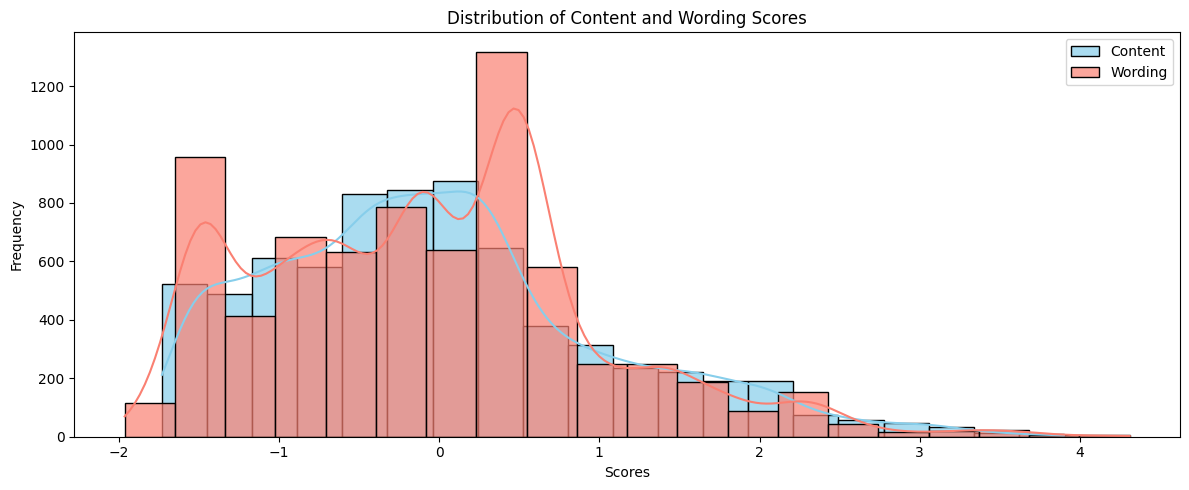

In [22]:
# Q. Look at the distributions of scores for content and wording, as histograms and scatterplots?


plt.figure(figsize=(12, 5))
sns.histplot(merged_df, x='content', bins=20, kde=True, color='skyblue', label='Content', alpha=0.7)
sns.histplot(merged_df, x='wording', bins=20, kde=True, color='salmon', label='Wording', alpha=0.7)
plt.title('Distribution of Content and Wording Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


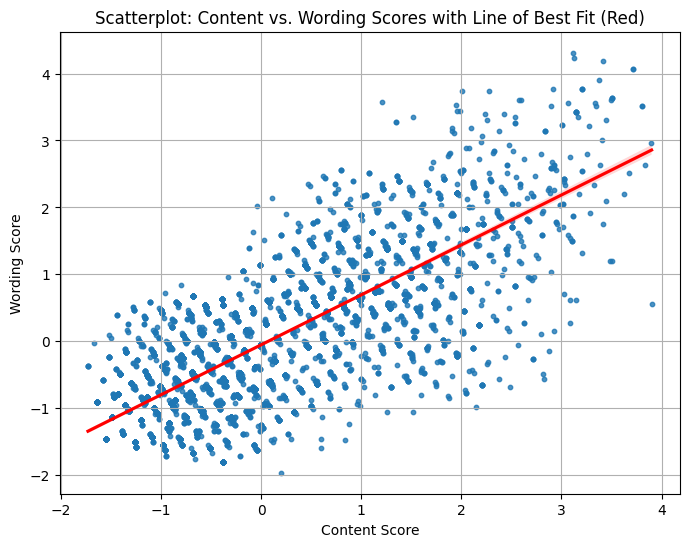

In [23]:
# Create a scatterplot to visualize the relationship between content and wording scores
# Added a red line of best fit

plt.figure(figsize=(8, 6))
sns.regplot(x='content', y='wording', data=merged_df, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title('Scatterplot: Content vs. Wording Scores with Line of Best Fit (Red)')
plt.xlabel('Content Score')
plt.ylabel('Wording Score')
plt.grid(True)
plt.show()

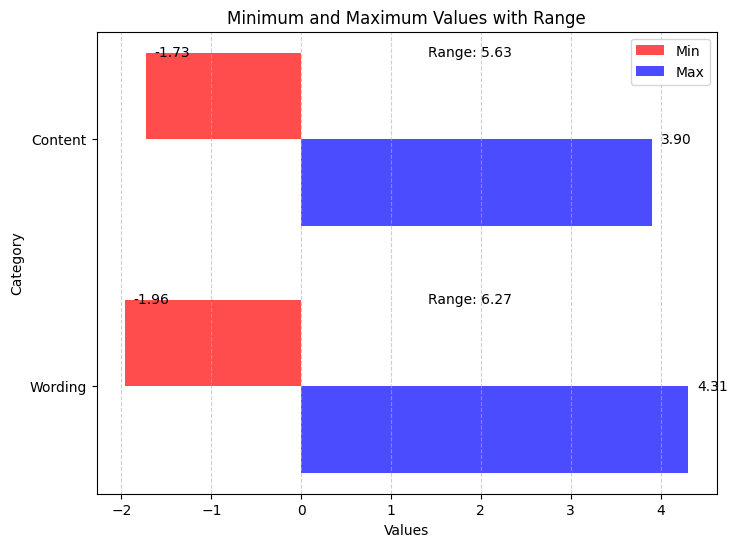

In [24]:
# Q. What is the range of values here?

content_min = merged_df['content'].min()
content_max = merged_df['content'].max()
wording_min = merged_df['wording'].min()
wording_max = merged_df['wording'].max()


# Calculate the range (max - min) for each category
content_range = content_max - content_min
wording_range = wording_max - wording_min

#BEGIN[ChatGPT GPT-3.5][https://chat.openai.com/auth/login]
# Create a horizontal bar chart
categories = ['Content', 'Wording']
min_values = [content_min, wording_min]
max_values = [content_max, wording_max]

fig, ax = plt.subplots(figsize=(8, 6))

bar_height = 0.35
index = range(len(categories))

bars1 = plt.barh(index, min_values, bar_height, label='Min', color='red', alpha=0.7)
bars2 = plt.barh([i + bar_height for i in index], max_values, bar_height, label='Max', color='blue', alpha=0.7)

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    range_text = f'Range: {max_values[i] - min_values[i]:.2f}'


    plt.text(max(max_values) + 0.1 -3.0, i - bar_height / 2, range_text, va='center', color='black', fontsize=10)
    plt.text(bar1.get_width() + 0.1, i - bar_height / 2, f'{bar1.get_width():.2f}', va='center', color='black', fontsize=10)
    plt.text(bar2.get_width() + 0.1, i + bar_height / 2, f'{bar2.get_width():.2f}', va='center', color='black', fontsize=10)

plt.ylabel('Category')
plt.xlabel('Values')
plt.title('Minimum and Maximum Values with Range')
plt.yticks([i + bar_height / 2 for i in index], categories)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.show()
#END[ChatGPT]






**Result analysis:** The range for content score is 5.63 and wording score is 6.27 with minimum and maximum values mentioned in the chart above.

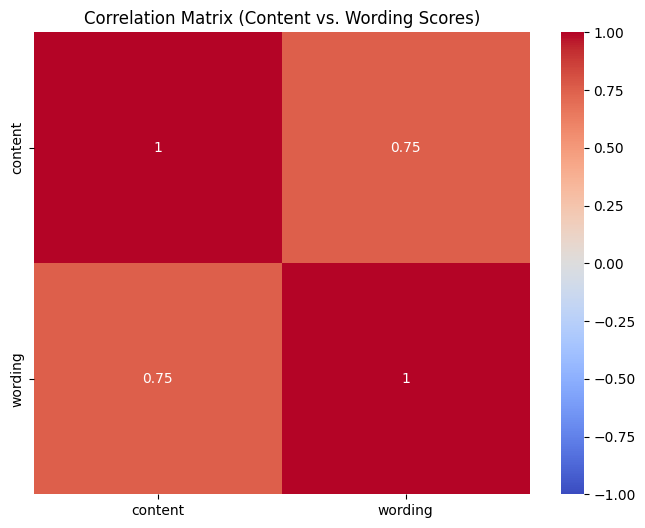

In [25]:
# Q. How well correlated are they?

correlation_matrix = merged_df[['content', 'wording']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Content vs. Wording Scores)')
plt.show()


**Result conclusion:** We observe strong positive correlation between content and wording scores = +0.75

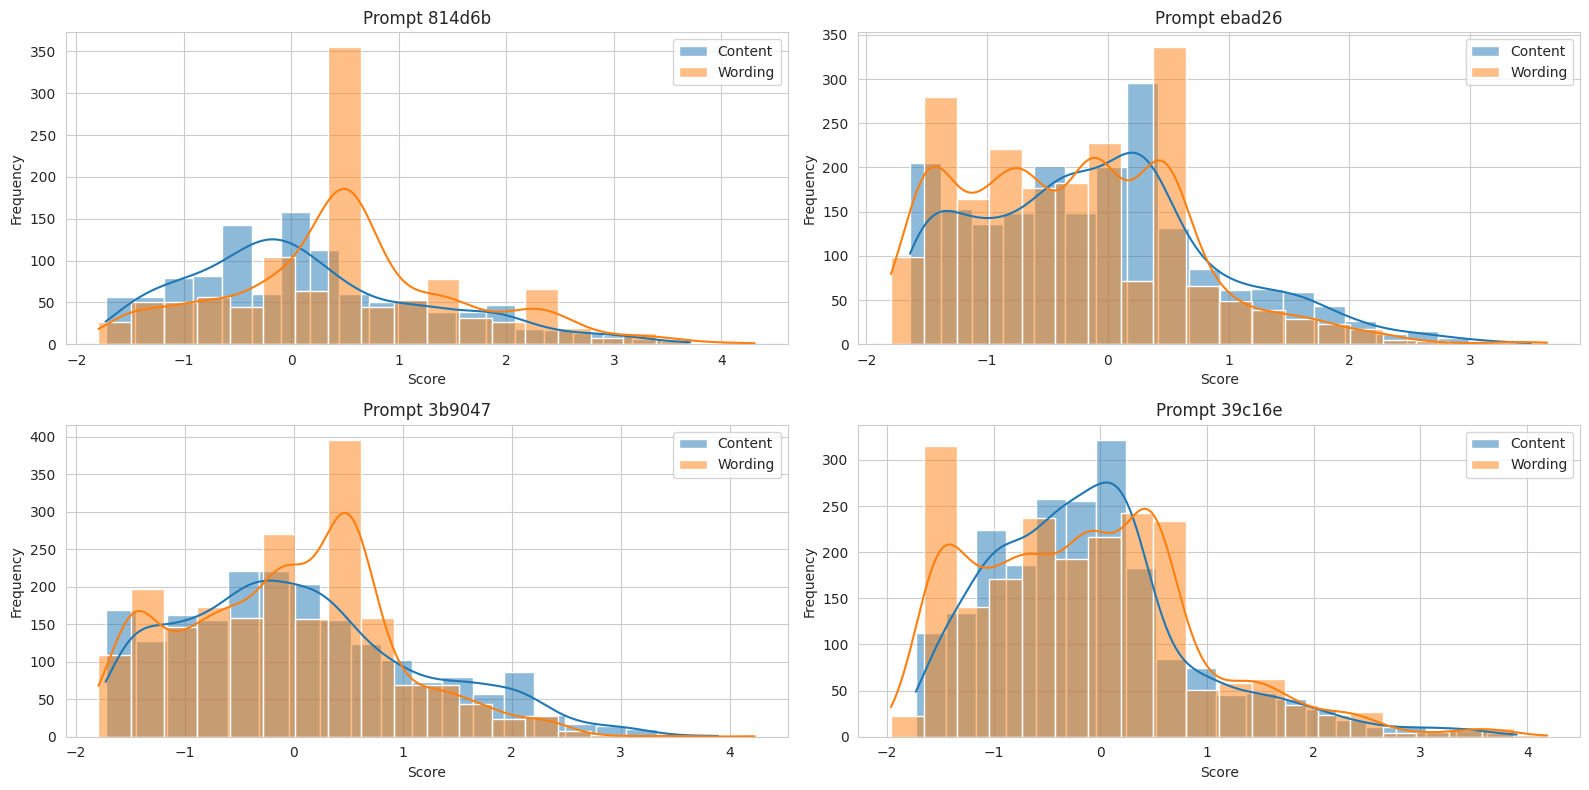

In [26]:
# Q. Do the shapes of these distributions differ for the different prompts?

# List of unique prompts in the dataset
unique_prompts = merged_df['prompt_id'].unique()

# Set Seaborn style and color palette
sns.set_style('whitegrid')
sns.set_palette('tab10')  # You can change 'pastel' to other Seaborn palettes

# Create separate histograms for content and wording scores for each prompt
plt.figure(figsize=(16, 8))

for i, prompt_id in enumerate(unique_prompts):
    plt.subplot(2, len(unique_prompts)//2, i + 1)
    sns.histplot(merged_df[merged_df['prompt_id'] == prompt_id]['content'], bins=20, alpha=0.5, label='Content', kde=True)
    sns.histplot(merged_df[merged_df['prompt_id'] == prompt_id]['wording'], bins=20, alpha=0.5, label='Wording', kde=True)
    plt.title(f'Prompt {prompt_id}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

**Result analysis:** Yes, the distributions do differ for different prompts as seen above.

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

QUESTION 5:
Which words are over-represented in good essays (as per content and wording) while being under-represented in bad ones?  Conversely, which words appear disproportionately in the bad essays?   What is an appropriate statistic to use here?

In [27]:
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [28]:
scaler = StandardScaler()
merged_df['content_normalized'] = scaler.fit_transform(merged_df[['content']])
merged_df['wording_normalized'] = scaler.fit_transform(merged_df[['wording']])

# Calculate mean and standard deviation for normalized scores
mean_content = merged_df['content_normalized'].mean()
std_content = merged_df['content_normalized'].std()
mean_wording = merged_df['wording_normalized'].mean()
std_wording = merged_df['wording_normalized'].std()

# Identify texts with scores beyond 1 standard deviation to the right for good essays
good_essays = merged_df[(merged_df['content_normalized'] > (mean_content + std_content)) & (merged_df['wording_normalized'] > (mean_wording + std_wording))]

# Identify texts with scores beyond 1 standard deviation to the left for bad essays
bad_essays = merged_df[(merged_df['content_normalized'] < (mean_content - std_content)) & (merged_df['wording_normalized'] < (mean_wording - std_wording))]


I have normalized the content and wording scores and classified good and bad essays as follows:

Good essay = Wording and Content scores beyond +1 standard deviation of the normal to the right of the median.

Bad essay = Wording and Content scores beyond -1 standard deviation of the normal to the left of the median.

In [29]:
# Tokenize
good_tokens = [word_tokenize(text.lower()) for text in good_essays['text']]
bad_tokens = [word_tokenize(text.lower()) for text in bad_essays['text']]

# Flatten
good_words = [word for sublist in good_tokens for word in sublist if word.isalpha() and word not in stop_words]
bad_words = [word for sublist in bad_tokens for word in sublist if word.isalpha() and word not in stop_words]

#word frequencies
good_word_freq = Counter(good_words)
bad_word_freq = Counter(bad_words)

#over-represented in good essays and under-represented in bad essays
overrepresented_words_good = [word for word, freq in good_word_freq.items() if freq > bad_word_freq[word] or word not in bad_words]
overrepresented_words_good = sorted(overrepresented_words_good, key=lambda word: good_word_freq[word], reverse=True)

underrepresented_words_good = [word for word, freq in bad_word_freq.items() if freq > good_word_freq[word] or word not in good_words]
underrepresented_words_good = sorted(underrepresented_words_good, key=lambda word: bad_word_freq[word], reverse=True)


# Find words over-represented in bad essays and under-represented in good essays
overrepresented_words_bad = [word for word, freq in bad_word_freq.items() if freq > good_word_freq[word]]
overrepresented_words_bad = sorted(overrepresented_words_bad, key=lambda word: bad_word_freq[word], reverse=True)

underrepresented_words_bad = [word for word, freq in good_word_freq.items() if freq > bad_word_freq[word]]
underrepresented_words_bad = sorted(underrepresented_words_bad, key=lambda word: bad_word_freq[word], reverse=True)

# Print the lists of top 10 over-represented and under-represented words
print("Top 10 Overrepresented Words in Good Essays:", overrepresented_words_good[:10])
print("\nTop 10 Underrepresented Words in Good Essays:", underrepresented_words_good[:10])

print("\nTop 10 Overrepresented Words in Bad Essays:", overrepresented_words_bad[:10])
print("\nTop 10 Underrepresented Words in Bad Essays:", underrepresented_words_bad[:10])


Top 10 Overrepresented Words in Good Essays: ['would', 'meat', 'students', 'tragedy', 'people', 'experiment', 'jones', 'also', 'good', 'spoiled']

Top 10 Underrepresented Words in Good Essays: ['smell', 'soda', 'rub', 'else', 'plan', 'chop', 'imitate', 'anything', 'arranged', 'whenever']

Top 10 Overrepresented Words in Bad Essays: ['smell', 'soda', 'rub', 'else', 'plan', 'chop', 'imitate', 'anything', 'arranged', 'whenever']

Top 10 Underrepresented Words in Bad Essays: ['would', 'meat', 'tragedy', 'spoiled', 'bad', 'good', 'could', 'gods', 'fear', 'people']


**Result analysis:** The words overrepresented in good essays are the same words underrepresented in bad essays due to the way the condition is framed.

The above results are also visualized in a treemap below under interesting charts in more detail.

## **Section 5: Three Interesting Plots (Q6, 15 points)**

Plot Number 1 - Correlation Matrix

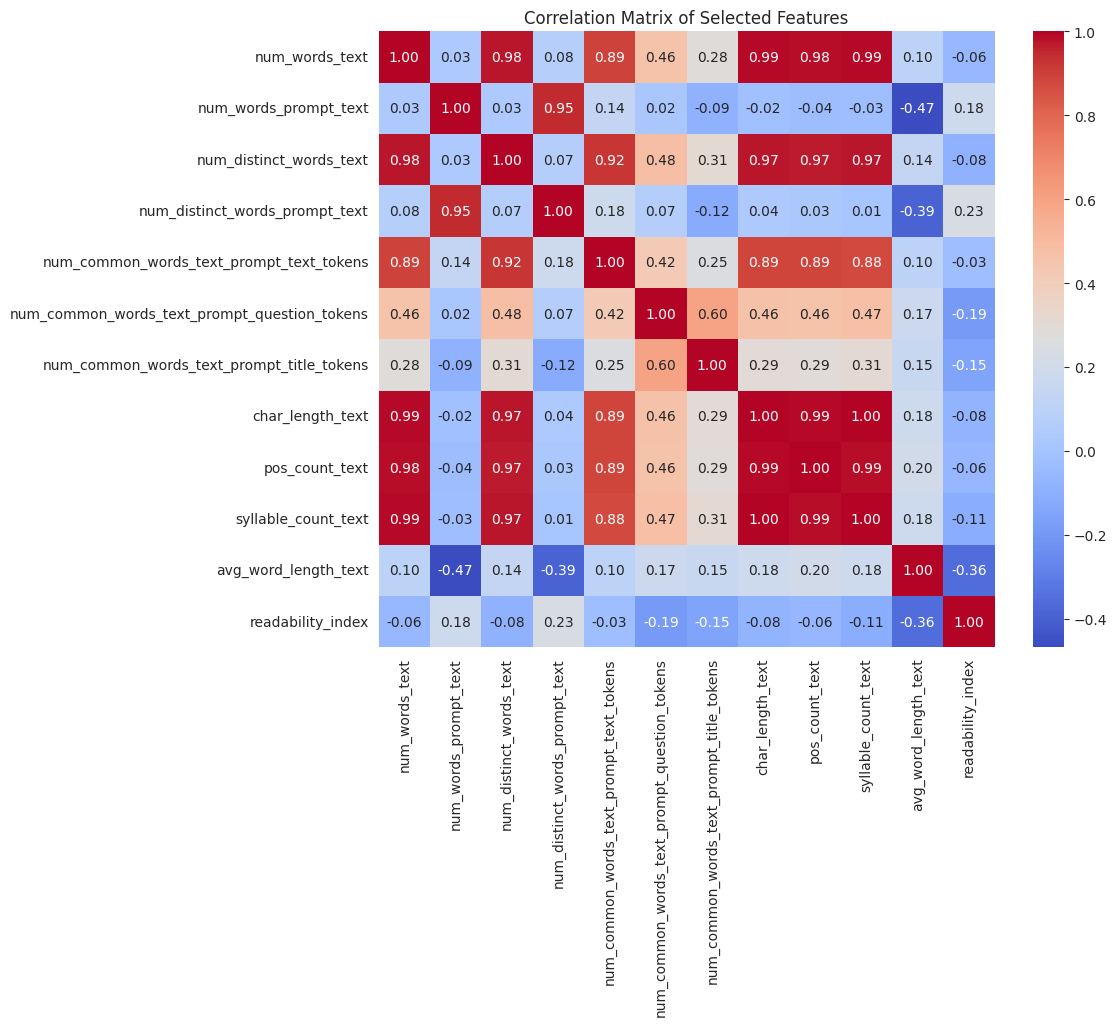

In [30]:
# Select the specified features
selected_features = [
"student_id", "prompt_id", "num_words_text","num_words_prompt_text", "num_distinct_words_text", "num_distinct_words_prompt_text",
                     "num_common_words_text_prompt_text_tokens", "num_common_words_text_prompt_question_tokens",
                     "num_common_words_text_prompt_title_tokens","char_length_text","pos_count_text","syllable_count_text","avg_word_length_text","readability_index"
]

# Create a correlation matrix for the selected features
correlation_matrix = merged_df[selected_features].corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Selected Features')
plt.show()


**Result Analysis:** The correlations range from -0.47 to +1.00
For example, we can see that average word length in the text is negatively correlated to number of words in prompt text, meaning more the average length of words in text, we observe shorter count of words in prompt text.
Similarly, number of important parts of speech in the text is highly positively correlated to the number of words in the text itself which can be inferred by intuition as well.

Plot Number 2 - Scatter Plot

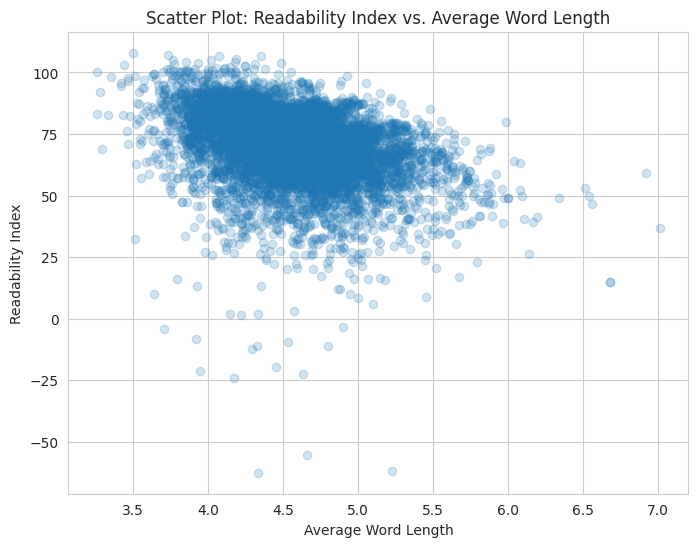

In [31]:
min_avg_word_length = merged_df["avg_word_length_text"].min()
max_avg_word_length = merged_df["avg_word_length_text"].max()
min_readability_index = merged_df["readability_index"].min()
max_readability_index = merged_df["readability_index"].max()


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_df["avg_word_length_text"],merged_df["readability_index"], alpha=0.2)
plt.title('Scatter Plot: Readability Index vs. Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Readability Index')

# Set the x and y scale limits to min and max values
# plt.ylim(min_readability_index, max_readability_index)
# plt.xlim(min_avg_word_length, max_avg_word_length)

plt.grid(True)
plt.show()

**Result Analysis:**
We observe from the scatter plot above that when the average word length in the text is smaller, it has a higher readability index meaning people find it more difficult to read sentences in any given text with longer words which are usually also complex. Using simple language with simple small words will help us communicate our information and knowledge better to the readers of the text.

In [32]:
import plotly.express as px

In [33]:
good_word_freq_df = pd.DataFrame(good_word_freq.items(), columns=['Word', 'Frequency'])

# Create a DataFrame for word frequencies in bad essays
bad_word_freq_df = pd.DataFrame(bad_word_freq.items(), columns=['Word', 'Frequency'])

# Sort the DataFrames by frequency in descending order
good_word_freq_df = good_word_freq_df.sort_values(by='Frequency', ascending=False)
bad_word_freq_df = bad_word_freq_df.sort_values(by='Frequency', ascending=False)

#BEGIN[ChatGPT GPT-3.5][https://chat.openai.com/auth/login]
# Create a treemap for good essays
fig_good = px.treemap(good_word_freq_df.head(50),
                      path=['Word'],
                      values='Frequency',
                      title='Top 50 Most Frequent Words in Good Essays',
                      color='Frequency',
                      color_continuous_scale='Viridis')

# Create a treemap for bad essays
fig_bad = px.treemap(bad_word_freq_df.head(50),
                     path=['Word'],
                     values='Frequency',
                     title='Top 50 Most Frequent Words in Bad Essays',
                     color='Frequency',
                     color_continuous_scale='Viridis')
#END[ChatGPT]

# Display the treemaps
fig_good.show()
fig_bad.show()



## **Section 6: Baseline Model (Q7, 10 points)**

QUESTION 7:

Now build a baseline model for this task. We will call this Model 0. You will train linear regression models for both content and wording on 80% of the training data and test it on the remaining 20% chosen at random.  Use only the original five features described above.  Report the mean squared error of each model. What do you make of the error rate?

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Mean Squared Error (Content Model): 0.32578784725349064
Mean Squared Error (Wording Model): 0.47745197786700205





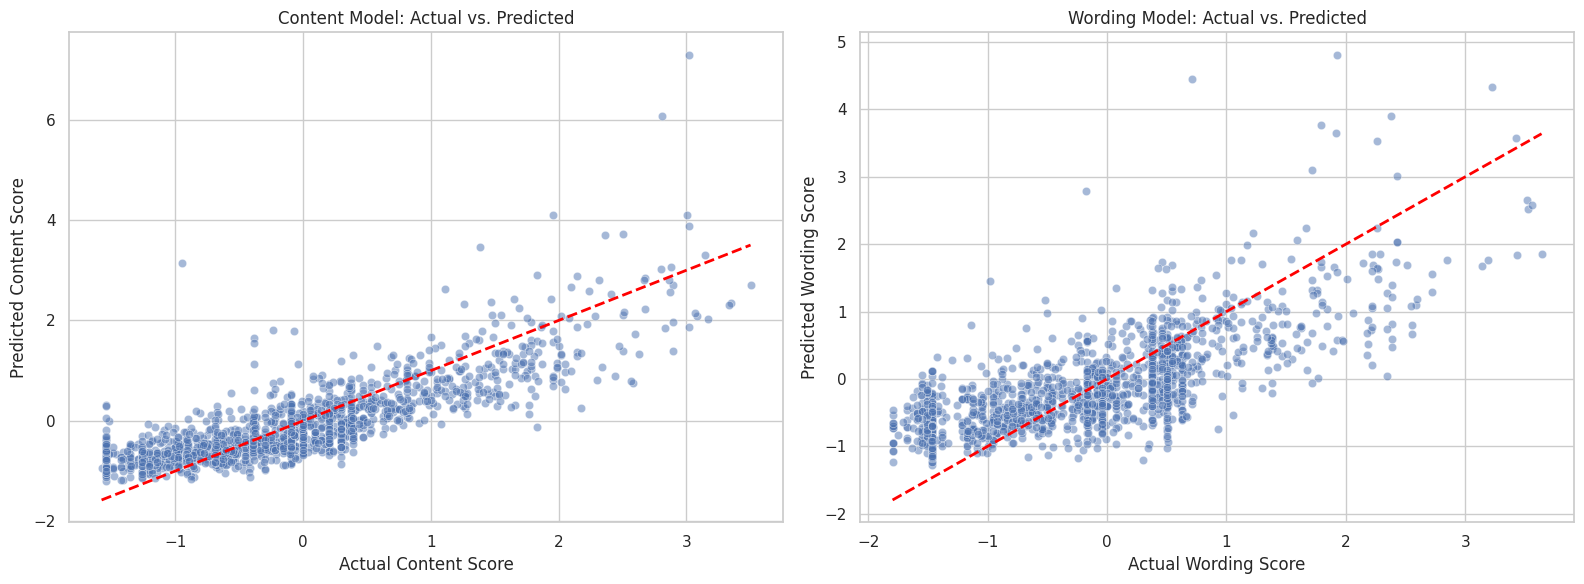

In [35]:
#Model 0 with initial 7 features from Q2

# Select the features and target variables
features = ["num_words_text","num_words_prompt_text", "num_distinct_words_text",
            "num_distinct_words_prompt_text","num_common_words_text_prompt_text_tokens",
            "num_common_words_text_prompt_question_tokens","num_common_words_text_prompt_title_tokens"]

target_content = 'content'
target_wording = 'wording'


X_train, X_test, y_train_content, y_test_content, y_train_wording, y_test_wording = train_test_split(
    merged_df[features],
    merged_df[target_content],
    merged_df[target_wording],
    test_size=0.2,# Splitting the data into training (80%) and testing (20%)
    shuffle=True, #randomizing
    random_state=91  # Setting a seed for reproducing same MSE when discussing the result later.
)

# Initialize and train linear regression models for content and wording
model_content = LinearRegression()
model_content.fit(X_train, y_train_content)

model_wording = LinearRegression()
model_wording.fit(X_train, y_train_wording)

# Make predictions on the test set
y_pred_content = model_content.predict(X_test)
y_pred_wording = model_wording.predict(X_test)

# Calculate MSE for content and wording models
mse_content = mean_squared_error(y_test_content, y_pred_content)
mse_wording = mean_squared_error(y_test_wording, y_pred_wording)

# Report the mean squared error of each model
print(f"Mean Squared Error (Content Model): {mse_content}")
print(f"Mean Squared Error (Wording Model): {mse_wording}")
print("\n\n")

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots for content and wording models
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the data points and fitted line for the Content Model
sns.scatterplot(x=y_test_content, y=y_pred_content, ax=axes[0], alpha=0.5)
sns.lineplot(x=[min(y_test_content), max(y_test_content)], y=[min(y_test_content), max(y_test_content)], ax=axes[0], linestyle='--', color='red', linewidth=2)
axes[0].set_xlabel('Actual Content Score')
axes[0].set_ylabel('Predicted Content Score')
axes[0].set_title('Content Model: Actual vs. Predicted')

# Plot the data points and fitted line for the Wording Model
sns.scatterplot(x=y_test_wording, y=y_pred_wording, ax=axes[1], alpha=0.5)
sns.lineplot(x=[min(y_test_wording), max(y_test_wording)], y=[min(y_test_wording), max(y_test_wording)], ax=axes[1], linestyle='--', color='red', linewidth=2)
axes[1].set_xlabel('Actual Wording Score')
axes[1].set_ylabel('Predicted Wording Score')
axes[1].set_title('Wording Model: Actual vs. Predicted')

# Display the plots
plt.tight_layout()
plt.show()




**Result Analysis:** The data given to us must be somewhat clean and pre-processed already which is why the MSE rates seen above, even though highest among all 3 models created, are still fairly less.

**Model 0:**

Mean Squared Error (Content Model): 0.32578784725349064

Mean Squared Error (Wording Model): 0.47745197786700205

## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

QUESTION 8:

The basic features as defined above are not really suited for the task.  Features can be preprocessed (or cleaned) to improve them before feeding into the model (e.g. normalize them, do a special treatment of missing values, etc). This can significantly improve the performance of your model. Do preprocessing for all the features (the original five plus the extra you add). Explain what you did.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [37]:
selected_features = ["num_words_text","num_words_prompt_text", "num_distinct_words_text", "num_distinct_words_prompt_text",
                     "num_common_words_text_prompt_text_tokens", "num_common_words_text_prompt_question_tokens",
                     "num_common_words_text_prompt_title_tokens","char_length_text","pos_count_text","syllable_count_text","avg_word_length_text","readability_index"]

target_content = 'content'
target_wording = 'wording'
# merged_df[selected_features].head()

In [38]:
X_train2, X_test2, y_train_content2, y_test_content2, y_train_wording2, y_test_wording2 = train_test_split(
    merged_df[selected_features],
    merged_df[target_content],
    merged_df[target_wording],
    test_size=0.2,# Splitting the data into training (80%) and testing (20%)
    shuffle=True, #randomizing
    random_state=91  # Setting a seed for reproducing same MSE when discussing the result later.
)

# Preprocessing Task 1: Normalize the Data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train2)
X_test_normalized = scaler.transform(X_test2)

threshold = 2.0
X_train_normalized = np.clip(X_train_normalized, 0, threshold)
X_test_normalized = np.clip(X_test_normalized, 0, threshold)

# Preprocessing Task 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_normalized)
X_test_scaled = scaler.transform(X_test_normalized)

# Preprocessing Task 3: Impute Missing Values (if any)
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)


For each of the two tasks (content and wording) create two models:

QUESTION 9 Part 1:

Model 1 should use the cleaned features and linear regression for training.  You can do some (potentially non-linear) scaling to keep the scores in range.

Mean Squared Error (Content Model): 0.3090181241529286
Mean Squared Error (Wording Model): 0.42461325604655753





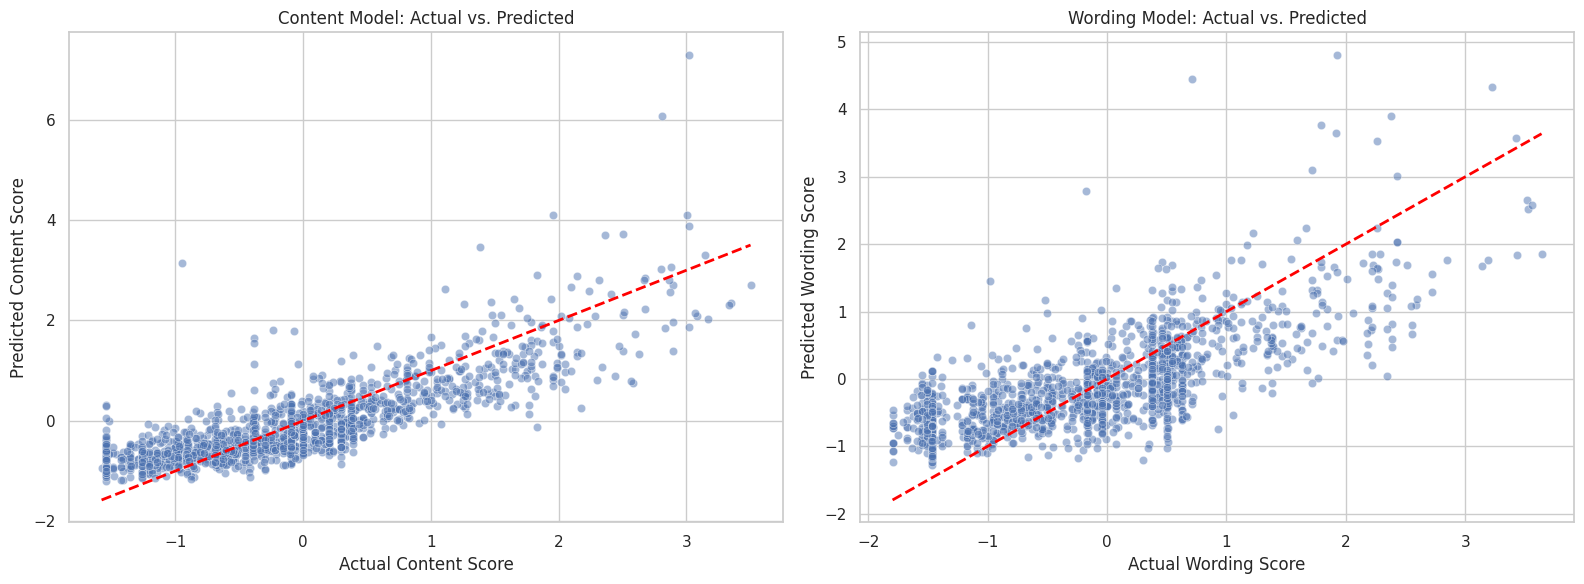

In [39]:
# Model 1 with 12 features and pre-processed data

# Initialize and train linear regression models for content and wording
model_content2 = LinearRegression()
model_content2.fit(X_train_scaled_imputed, y_train_content2)

model_wording2 = LinearRegression()
model_wording2.fit(X_train_scaled_imputed, y_train_wording2)

# Make predictions on the test set
y_pred_content2 = model_content2.predict(X_test_scaled_imputed)
y_pred_wording2 = model_wording2.predict(X_test_scaled_imputed)

# Calculate MSE
mse_content2 = mean_squared_error(y_test_content2, y_pred_content2)
mse_wording2 = mean_squared_error(y_test_wording2, y_pred_wording2)

print(f"Mean Squared Error (Content Model): {mse_content2}")
print(f"Mean Squared Error (Wording Model): {mse_wording2}")
print("\n\n")


sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.scatterplot(x=y_test_content, y=y_pred_content, ax=axes[0], alpha=0.5)
sns.lineplot(x=[min(y_test_content), max(y_test_content)], y=[min(y_test_content), max(y_test_content)], ax=axes[0], linestyle='--', color='red', linewidth=2)
axes[0].set_xlabel('Actual Content Score')
axes[0].set_ylabel('Predicted Content Score')
axes[0].set_title('Content Model: Actual vs. Predicted')

sns.scatterplot(x=y_test_wording, y=y_pred_wording, ax=axes[1], alpha=0.5)
sns.lineplot(x=[min(y_test_wording), max(y_test_wording)], y=[min(y_test_wording), max(y_test_wording)], ax=axes[1], linestyle='--', color='red', linewidth=2)
axes[1].set_xlabel('Actual Wording Score')
axes[1].set_ylabel('Predicted Wording Score')
axes[1].set_title('Wording Model: Actual vs. Predicted')

plt.tight_layout()
plt.show()

**Result Analysis:** The MSE values are lower than Model 0 but still higher than Model 2 below. The pre-processing helped the data normalize and scaled it to same standards which improved the model output:

**Model 1**

Mean Squared Error (Content Model): 0.3090181241529286

Mean Squared Error (Wording Model): 0.42461325604655753

QUESTION 9 Part 2:

Model 2 should use the cleaned features and an algorithm other than logistic regression (e.g. Random Forest, Nearest Neighbor, etc) for training.

I have chosen XGBoost since it can provide high predictive accuracy by building an ensemble of weak learners. They are particularly effective for complex regression tasks

In [41]:
!pip install xgboost

In [42]:
import xgboost as xgb

Mean Squared Error (Content Model): 0.20988365918195778
Mean Squared Error (Wording Model): 0.3760443611109008





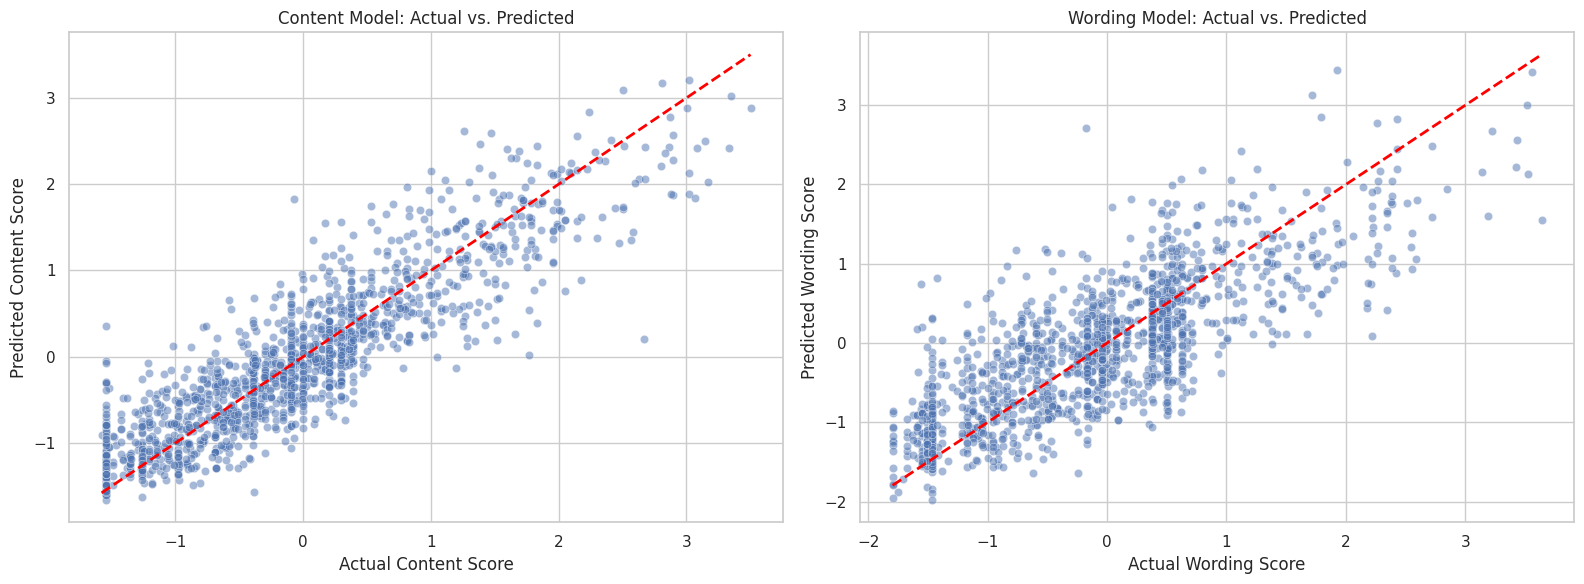

In [43]:
#Model 2 with pre-processed features from above and XGBoost model

# Initialize and train XGBoost regression models for content and wording
model_content3 = xgb.XGBRegressor()
model_content3.fit(X_train_scaled_imputed, y_train_content2)

model_wording3 = xgb.XGBRegressor()
model_wording3.fit(X_train_scaled_imputed, y_train_wording2)

# Make predictions on the test set
y_pred_content3 = model_content3.predict(X_test_scaled_imputed)
y_pred_wording3 = model_wording3.predict(X_test_scaled_imputed)

# Calculate MSE for content and wording models
mse_content3 = mean_squared_error(y_test_content2, y_pred_content3)
mse_wording3 = mean_squared_error(y_test_wording2, y_pred_wording3)

# Report the mean squared error of each model
print(f"Mean Squared Error (Content Model): {mse_content3}")
print(f"Mean Squared Error (Wording Model): {mse_wording3}")
print("\n\n")


sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.scatterplot(x=y_test_content2, y=y_pred_content3, ax=axes[0], alpha=0.5)
sns.lineplot(x=[min(y_test_content2), max(y_test_content2)], y=[min(y_test_content2), max(y_test_content2)], ax=axes[0], linestyle='--', color='red', linewidth=2)
axes[0].set_xlabel('Actual Content Score')
axes[0].set_ylabel('Predicted Content Score')
axes[0].set_title('Content Model: Actual vs. Predicted')

sns.scatterplot(x=y_test_wording2, y=y_pred_wording3, ax=axes[1], alpha=0.5)
sns.lineplot(x=[min(y_test_wording2), max(y_test_wording2)], y=[min(y_test_wording2), max(y_test_wording2)], ax=axes[1], linestyle='--', color='red', linewidth=2)
axes[1].set_xlabel('Actual Wording Score')
axes[1].set_ylabel('Predicted Wording Score')
axes[1].set_title('Wording Model: Actual vs. Predicted')

plt.tight_layout()
plt.show()


**Result analysis:** Model 2 has the best MSE scores among all 3 models. This tells us that this dataset might not be best served by Linear Regression and a high performing model like XGBoost gives a better accuracy in prediction. We also observed that there was an improvement in the model performance after the data pre-processing done prior to running Model 1 which is also an essential step.

Model 2:

Mean Squared Error (Content Model): 0.20988365918195778

Mean Squared Error (Wording Model): 0.3760443611109008

All 3 models comparison table:



---



Mean Squared Error (Content Model 0): 0.32578784725349064

Mean Squared Error (Content Model 1): 0.3090181241529286

Mean Squared Error (Content Model 2): 0.20988365918195778



---


Mean Squared Error (Wording Model 0): 0.47745197786700205

Mean Squared Error (Wording Model 1): 0.42461325604655753

Mean Squared Error (Wording Model 2): 0.3760443611109008

## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):